<a href="https://colab.research.google.com/github/mj-debug/CSS-GRID-WEBDEVES/blob/master/IDS_4_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

In [2]:
# importing library for plotting
import matplotlib.pyplot as plt

In [3]:
import pickle   # saving and loading trained model
from os import path

In [4]:
# importing required libraries for normalizing data
import sklearn
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
# importing libary for classification report
from sklearn.metrics import classification_report

# Importing dataset

In [6]:
df = pd.read_csv("/content/drive/MyDrive/BoTNeTIoT-L01-v2.csv") # 0 is an attack sample, 1 is a normal sample
df.head() # To display for rows of data entry

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,98.000000,...,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,138.592929,...,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,114.856432,...,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


In [7]:
# total number of data samples
print(len(df))

7062606


# Binary Classification

In [8]:
df["label"].unique() # 0 means attack sample, 1 means normal sample

array([0, 1])

In [9]:
sum(df["label"] == 1)   # normal sample

555932

In [10]:
sum(df["label"] == 0)   # abnormal sample

6506674

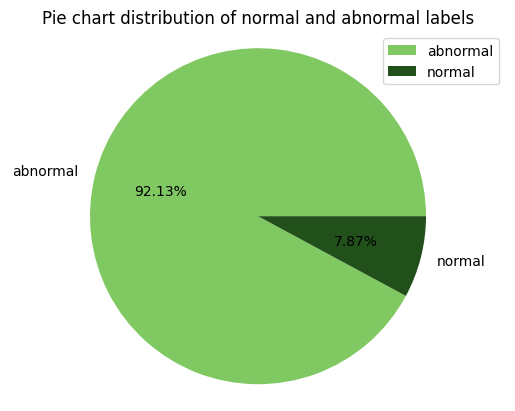

In [11]:
# Pie chart distribution of normal and abnormal labels
# Create the pie chart

labels = df["label"].unique()
labels = ["abnormal", "normal"]
plt.pie(df["label"].value_counts(), labels = labels, colors = ["#80c861", "#21501b"], autopct='%0.2f%%')

plt.title("Pie chart distribution of normal and abnormal labels")

plt.legend()
# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

# Multiclass Classification

In [12]:
df["Device_Name"].unique()

array(['Danmini_Doorbell', 'Ecobee_Thermostat', 'Ennio_Doorbell',
       'Philips_B120N10_Baby_Monitor',
       'Provision_PT_737E_Security_Camera',
       'Provision_PT_838_Security_Camera', 'Samsung_SNH_1011_N_Webcam',
       'SimpleHome_XCS7_1002_WHT_Security_Camera',
       'SimpleHome_XCS7_1003_WHT_Security_Camera'], dtype=object)

In [13]:
df["Attack"].unique() # We're using 1 for normal, 2 for mirai and 3 for gafgyt

array(['gafgyt', 'mirai', 'Normal'], dtype=object)

In [14]:
df["Attack_subType"].unique() # 0 means attack sample, 1 means normal sample

array(['combo', 'junk', 'scan', 'tcp', 'udp', 'ack', 'syn', 'udpplain',
       'Normal'], dtype=object)

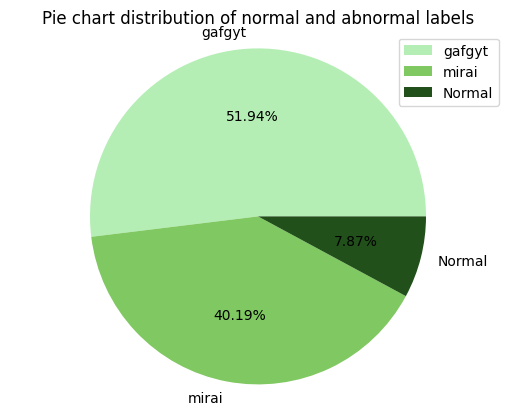

In [15]:
# Pie chart distribution of normal and attack labels
# Create the pie chart
plt.pie(df["Attack"].value_counts(), labels = df["Attack"].unique(), colors = ["#b4eeb4","#80c861", "#21501b"], autopct='%0.2f%%')

plt.title("Pie chart distribution of normal and abnormal labels")

plt.legend()
# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis("equal")

# Display the chart
plt.show()

In [16]:
# Create a dictionary to map categories to numbers
category_mapping = {
    'Normal': 1,
    'mirai': 2,
    'gafgyt': 3
    }

# Apply the mapping to create a new column with numerical representation
df["Attack"] = df["Attack"].map(category_mapping)

In [17]:
df.head()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,98.000000,...,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,3,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,138.592929,...,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,Danmini_Doorbell,3,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,114.856432,...,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,Danmini_Doorbell,3,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,3,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,3,combo,0


# One hot encoding

In [18]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=["Device_Name", "Attack_subType"])

In [19]:
df.head()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,Device_Name_SimpleHome_XCS7_1003_WHT_Security_Camera,Attack_subType_Normal,Attack_subType_ack,Attack_subType_combo,Attack_subType_junk,Attack_subType_scan,Attack_subType_syn,Attack_subType_tcp,Attack_subType_udp,Attack_subType_udpplain
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,98.000000,...,0,0,0,1,0,0,0,0,0,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,138.592929,...,0,0,0,1,0,0,0,0,0,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,114.856432,...,0,0,0,1,0,0,0,0,0,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,74.000000,...,0,0,0,1,0,0,0,0,0,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,74.000000,...,0,0,0,1,0,0,0,0,0,0


# Modelling and Training

In [20]:
# splitting our dataset into 70% train & 30% test dataset.
train, test = np.split(df.sample(frac = 1), [int(0.7 * len(df))])

# Sampling our data

In [21]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values   # feature matrix (x plane)
    y = dataframe[dataframe.columns[-1]].values    # target vector (y plane)

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [22]:
# checking the number of normal & abnormal sample in the training dataset
print(len(train[train["label"] == 1]))  # normal sample
print(len(train[train["label"] == 0]))  # abnormal sample

389671
4554153


In [23]:
# checking the number of normal and abnormal samples in the test dataset
print(len(test[test["label"] == 1]))  # normal sample
print(len(test[test["label"] == 0]))  # abnormal sample

166261
1952521


# Normalizing our train dataset

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample = True)
test, x_test, y_test = scale_dataset(test, oversample = False)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train,y_train)

In [ ]:
y_pred = dt_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn_model = MLPClassifier()
nn_model = nn_model.fit(x_train, y_train)

In [ ]:
y_pred = nn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))